In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#a) Loading the wine dataset and identify the categorical feature:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

#Identify the categorical feature
categorical_feature = 'target'

#Computing the frequency of each value of the categorical feature
categorical_frequency = df[categorical_feature].value_counts()
print(categorical_frequency)

1    71
0    59
2    48
Name: target, dtype: int64


In [ ]:
#b) Compute univariate and multivariate summaries for all numerical features:
#For Univariate
numerical_summary1 = df.median()
numerical_summary2 = df.mean()
print(numerical_summary1)
print(numerical_summary2)
#For Multivariate
numerical_summary3 = df.corr()
numerical_summary4 = df.cov()
print(numerical_summary3)
print(numerical_summary4)

alcohol                          13.050
malic_acid                        1.865
ash                               2.360
alcalinity_of_ash                19.500
magnesium                        98.000
total_phenols                     2.355
flavanoids                        2.135
nonflavanoid_phenols              0.340
proanthocyanins                   1.555
color_intensity                   4.690
hue                               0.965
od280/od315_of_diluted_wines      2.780
proline                         673.500
target                            1.000
dtype: float64
alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.05

In [ ]:
#c) Group observations by the categorical feature and compute the corresponding median for each remaining numerical feature:

categorical_median = df.groupby(categorical_feature).median()
print(categorical_median)

        alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
target                                                            
0        13.750       1.770  2.44               16.8      104.0   
1        12.290       1.610  2.24               20.0       88.0   
2        13.165       3.265  2.38               21.0       97.0   

        total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
target                                                                     
0               2.800       2.980                  0.29            1.870   
1               2.200       2.030                  0.37            1.610   
2               1.635       0.685                  0.47            1.105   

        color_intensity    hue  od280/od315_of_diluted_wines  proline  
target                                                                 
0                  5.40  1.070                          3.17   1095.0  
1                  2.90  1.040                          2.83    495

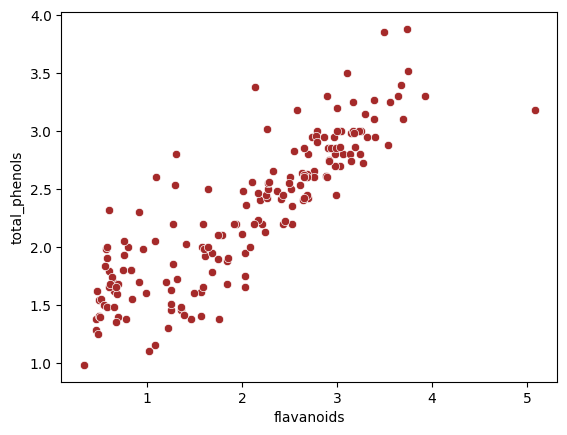

In [ ]:
#d) Create a scatter plot for the pair of distinct numerical features with the highest correlation:

correlation_matrix = df.corr()
max_correlation = correlation_matrix.unstack().sort_values().drop_duplicates()
highest_correlation_features = max_correlation.index[-2]

#Scatter plot
sns.scatterplot(x=highest_correlation_features[0], y=highest_correlation_features[1], data=df, c='brown')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

#Loading the  dataset
df = pd.read_csv('country-income.csv')

In [ ]:
#Missing values so we initialize SimpleImputer for numerical features
imputer = SimpleImputer(strategy='mean')

#Identify the numerical features
numerical_features = df.select_dtypes(include='number')

#Applying imputer to numerical features
df[numerical_features.columns] = imputer.fit_transform(df[numerical_features.columns])

In [ ]:
#LabelEncoder for categorical features

categorical_encoder = LabelEncoder()

#Identify categorical features

categorical_features = df.select_dtypes(exclude='number')

#Applying encoder to categorical features

df[categorical_features.columns] = df[categorical_features.columns].apply(categorical_encoder.fit_transform)

print(df)

   Region        Age        Income  Online Shopper
0       1  49.000000  86400.000000               0
1       0  32.000000  57600.000000               1
2       2  35.000000  64800.000000               0
3       0  43.000000  73200.000000               0
4       2  45.000000  76533.333333               1
5       1  40.000000  69600.000000               1
6       0  43.777778  62400.000000               0
7       1  53.000000  94800.000000               1
8       2  55.000000  99600.000000               0
9       1  42.000000  80400.000000               1


In [ ]:
from scipy.stats import pearsonr

#Loading the dataset

data = pd.read_csv('shoesize.csv')
#Separating the data into male and female subjects

female_data = data[data['Gender'] == 'F']
male_data = data[data['Gender'] == 'M']

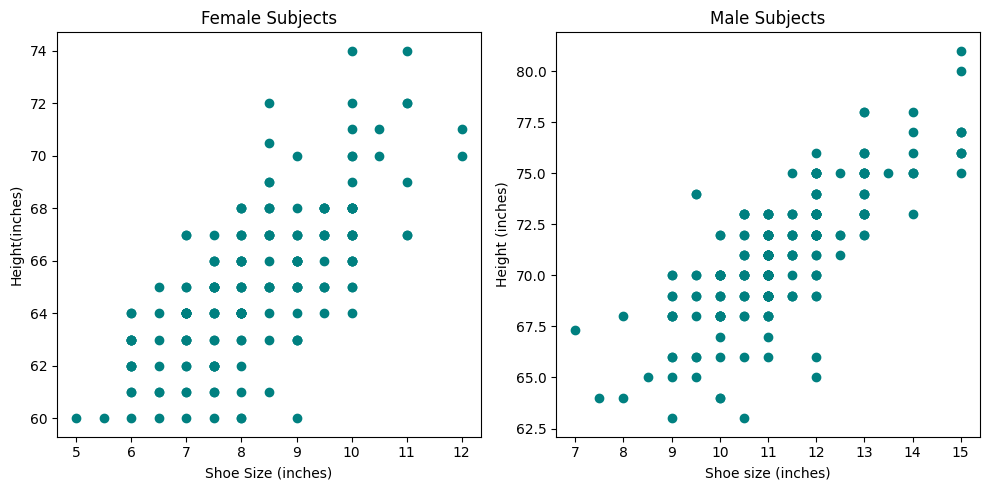

In [ ]:
#Scatterplot forr female subjects

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(female_data['Size'], female_data['Height'], c='teal')
plt.title('Female Subjects')
plt.xlabel('Shoe Size (inches)')
plt.ylabel('Height(inches)')

#Scatterplot for male subjects

plt.subplot(1,2,2)
plt.scatter(male_data['Size'], male_data['Height'], c='teal')
plt.title('Male Subjects')
plt.xlabel('Shoe size (inches)')
plt.ylabel('Height (inches)')

plt.tight_layout()
plt.show()

In [ ]:
#Calculating Pearson's correlation coefficients

corr_coeff_female, _ = pearsonr(female_data['Size'], female_data['Height'])
corr_coeff_male, _ = pearsonr(male_data['Size'], male_data['Height'])

print("Pearson's Correlation Coefficient for Female Subjects:" , corr_coeff_female)
print("Pearson's Correlation Coefficient for Male Subjects:", corr_coeff_male)



Pearson's Correlation Coefficient for Female Subjects: 0.7078119417143971
Pearson's Correlation Coefficient for Male Subjects: 0.7677093547300977


In [ ]:
from sklearn.decomposition import PCA

#Loading the dataset

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)


#Separating the features and target

target_drop = df.drop('target', axis=1)
target = df['target']

#Performing PCA with 2 components

pca = PCA(n_components=2)
principal_comps = pca.fit_transform(df)

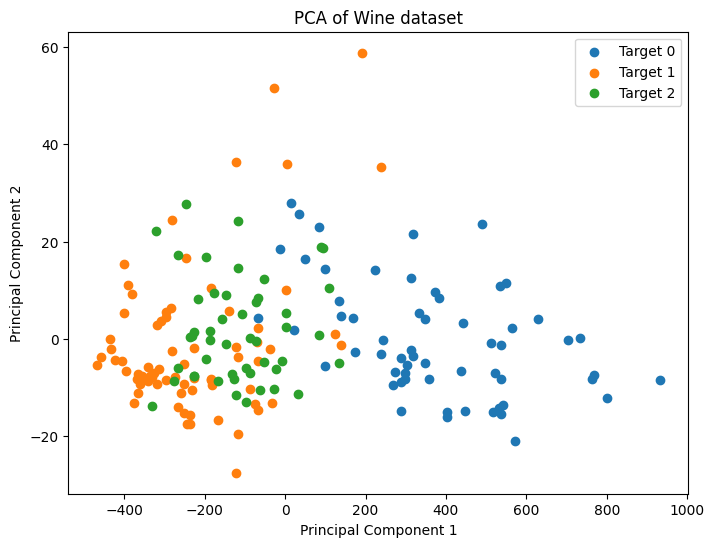

In [ ]:
#Scatterplot for the principal components

plt.figure(figsize=(8,6))

#Defining colors for each class

for target_value in np.unique(target):
    plt.scatter(
        principal_comps[target == target_value, 0],
        principal_comps[target == target_value, 1],
        label=f'Target {target_value}',
    )


plt.title('PCA of Wine dataset')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

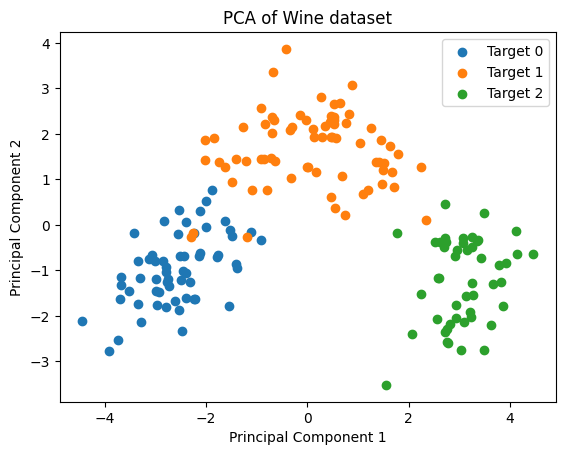

In [ ]:
from sklearn.preprocessing import StandardScaler

#Creating an instance of StandardScaler for standardization
scaler = StandardScaler()

#Standardizing the features by fitting and transforming the data
X_scaled = scaler.fit_transform(df)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

#Scatterplot for each class in the principal component space

for target_value in np.unique(target):
    plt.scatter(
        principal_components[target == target_value, 0],
        principal_components[target == target_value, 1],
        label=f'Target {target_value}',
    )

plt.title('PCA of Wine dataset')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


In [ ]:
# If you are using Google Colab, you would need to run the below line to install Cubes.
# You can comment the below line if you are running a local python installation with Cubes installed.
!pip install cubes
!pip install sqlalchemy==1.3.20

In [ ]:
from cubes import Workspace
from cubes.tutorial.sql import create_table_from_csv
from sqlalchemy import create_engine
from sklearn.impute import SimpleImputer
import cubes as cubes
#Loading and preprocessing the dataset

df = pd.read_csv('country-income.csv')

#Applying imputation to handle missing values
imputer = SimpleImputer(strategy='mean')
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

#Saving the preprocessed dataset back to country-income.csv

df.to_csv('country-income.csv', index=False)
#Creating a SQLite database 'data.sqlite' and define the table schema

engine = create_engine ('sqlite:///data.sqlite')
create_table_from_csv(engine,
                      "country-income.csv",
                      table_name="cntry_income",
                      fields=[
                          ("region", "string"),
                          ("age", "integer"),
                          ("income", "integer"),
                          ("online_shopper", "string")],
                      create_id=True
                     )

#Setting up the cubes workspace

workspace = Workspace()
workspace.register_default_store("sql", url="sqlite:///data.sqlite")

#Importing the data cube model

workspace.import_model("country_income_model.json")

#The json file country_income_model.json includes
# {
#     "dimensions": [
#         {
#             "name": "region",
#             "label": "Region",
#             "attributes": ["region"]
#         },
#         {
#             "name": "age",
#             "label": "Age",
#             "attributes": ["age"]
#         },
#         {
#             "name": "online_shopper",
#             "label": "Online Shopper",
#             "attributes": ["online_shopper"]
#         }
#     ],
#     "cubes": [
#         {
#             "name": "cntry_income",
#             "dimensions": ["region", "age", "online_shopper"],
#             "measures": [
#                 {
#                     "name": "income",
#                     "label": "Income"
#                 }
#             ],
#             "aggregates": [
#                 {
#                     "name": "total_income",
#                     "function": "sum",
#                     "measure": "income"
#                 },
#                 {
#                     "name": "average_income",
#                     "function": "avg",
#                     "measure": "income"
#                 },
#                 {
#                     "name": "min_income",
#                     "function": "min",
#                     "measure": "income"
#                 },
#                 {
#                     "name": "max_income",
#                     "function": "max",
#                     "measure": "income"
#                 }
#             ],
#             "mappings": {
#                 "region": "region",
#                 "age": "age",
#                 "online_shopper": "online_shopper"
#             }
#         }
#     ]
# }



#Accessing the data cube

cube = workspace.cube("cntry_income")
browser = workspace.browser(cube)

In [ ]:
#Perform aggregations and print results

#Aggregation for the whole data cube

result = browser.aggregate()
print("The result summary for the whole data")
print(result.summary)

#Access and print specific measures
print("The total income is "+ str(result.summary["total_income"]))
print("The average income is "+ str(result.summary["average_income"]))
print("The minimum income is "+ str(result.summary["min_income"]))
print("The maximum income is "+ str(result.summary["max_income"]))

#Drilldown by region

result = browser.aggregate(drilldown=["region"])
for record in result:
    print(record)

#Drilldown by online shopping activity

result = browser.aggregate(drilldown=["online_shopper"])
for record in result:
    print(record)

#Aggregating results for people agd between 40 and 50

cuts = [cubes.RangeCut("age", ["40"], ["50"])]
cell = cubes.Cell(cube, cuts)
result = browser.aggregate(cell)
print(result.summary)


The result summary for the whole data
{'total_income': 765333.3333333333, 'average_income': 76533.33333333333, 'min_income': 57600, 'max_income': 99600}
The total income is 765333.3333333333
The average income is 76533.33333333333
The minimum income is 57600
The maximum income is 99600
{'region': 'Brazil', 'total_income': 193200, 'average_income': 64400.0, 'min_income': 57600, 'max_income': 73200}
{'region': 'India', 'total_income': 331200, 'average_income': 82800.0, 'min_income': 69600, 'max_income': 94800}
{'region': 'USA', 'total_income': 240933.3333333333, 'average_income': 80311.11111111111, 'min_income': 64800, 'max_income': 99600}
{'online_shopper': 'No', 'total_income': 386400, 'average_income': 77280.0, 'min_income': 62400, 'max_income': 99600}
{'online_shopper': 'Yes', 'total_income': 378933.3333333333, 'average_income': 75786.66666666666, 'min_income': 57600, 'max_income': 94800}
{'total_income': 448533.3333333333, 'average_income': 74755.55555555555, 'min_income': 62400, 'm